In [1]:
from wordcloud import WordCloud
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
filepath = "C:/Users/subro/Downloads/Indian-Resturants.csv"
zodata = pd.read_csv(filepath)

In [3]:
print(zodata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [4]:
print(zodata.isnull().sum())

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64


In [5]:
zodata.drop(columns=['zipcode'], inplace=True)

In [6]:
zodata.loc[zodata['city'] == 'Bhopal', 'address'] = zodata.loc[zodata['city'] == 'Bhopal', 'address'].fillna('Unknown Address, Bhopal')
zodata.loc[zodata['city'] == 'Hyderabad', 'address'] = zodata.loc[zodata['city'] == 'Hyderabad', 'address'].fillna('Unknown Address, Hyderabad')
zodata.loc[zodata['city'] == 'Junagadh', 'address'] = zodata.loc[zodata['city'] == 'Junagadh', 'address'].fillna('Unknown Address, Junagadh')
zodata.loc[zodata['city'] == 'Kharagpur', 'address'] = zodata.loc[zodata['city'] == 'Kharagpur', 'address'].fillna('Unknown Address, Kharagpur')
zodata.loc[zodata['city'] == 'Raipur', 'address'] = zodata.loc[zodata['city'] == 'Raipur', 'address'].fillna('Unknown Address, Raipur')
zodata.loc[zodata['city'] == 'Udaipur', 'address'] = zodata.loc[zodata['city'] == 'Udaipur', 'address'].fillna('Unknown Address, Udaipur')

In [7]:
zodata['cuisines'].fillna('Unknown Cuisine', inplace=True)
zodata['timings'].fillna('Not available', inplace=True)
zodata['opentable_support'] = zodata['opentable_support'].astype(str)
zodata['opentable_support'].fillna('No', inplace=True)

In [8]:
print(zodata.isnull().sum())

res_id                  0
name                    0
establishment           0
url                     0
address                 0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
country_id              0
locality_verbose        0
cuisines                0
timings                 0
average_cost_for_two    0
price_range             0
currency                0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
opentable_support       0
delivery                0
takeaway                0
dtype: int64


C:\Users\subro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


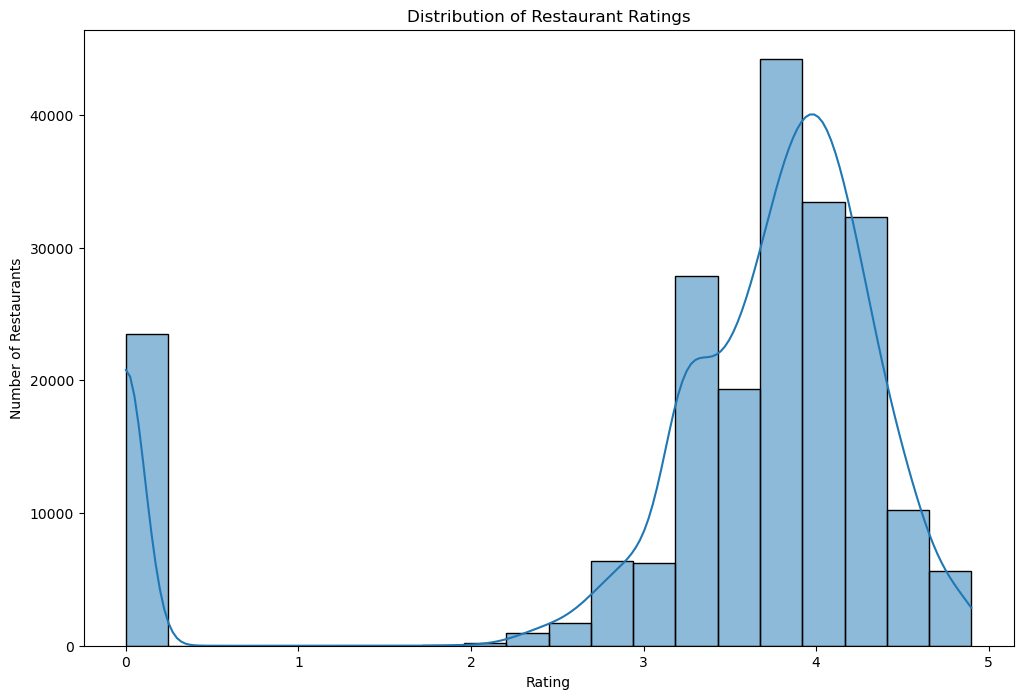

The average rating is 3.3959366625146266


In [9]:
average_rating = zodata['aggregate_rating'].mean()
plt.figure(figsize=(12, 8))
sns.histplot(zodata['aggregate_rating'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.show()
print(f"The average rating is {average_rating}")

City with the highest concentration of restaurants: Chennai



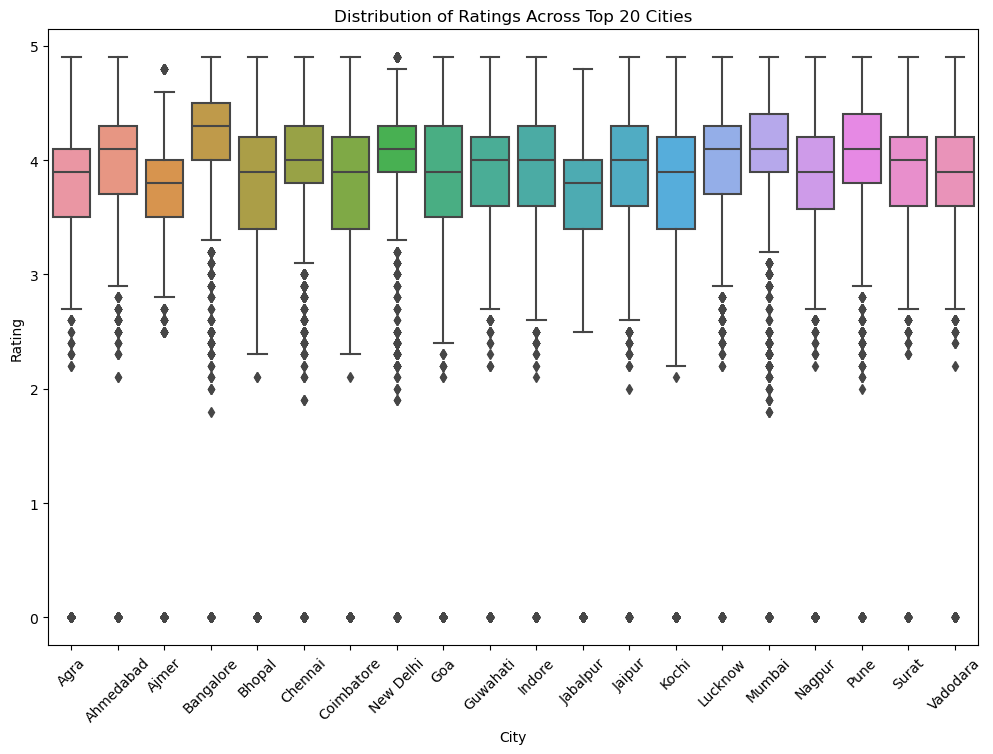

In [10]:
city_counts = zodata['city'].value_counts()
print("City with the highest concentration of restaurants:", city_counts.idxmax())
print()


city_restaurant_count = zodata['city'].value_counts().reset_index()
city_restaurant_count.columns = ['City', 'No. of Restaurants']


top_cities = city_restaurant_count.head(20)


plt.figure(figsize=(12, 8))
sns.boxplot(x='city', y='aggregate_rating', data=zodata[zodata['city'].isin(top_cities['City'])])
plt.title('Distribution of Ratings Across Top 20 Cities')
plt.xlabel('City')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

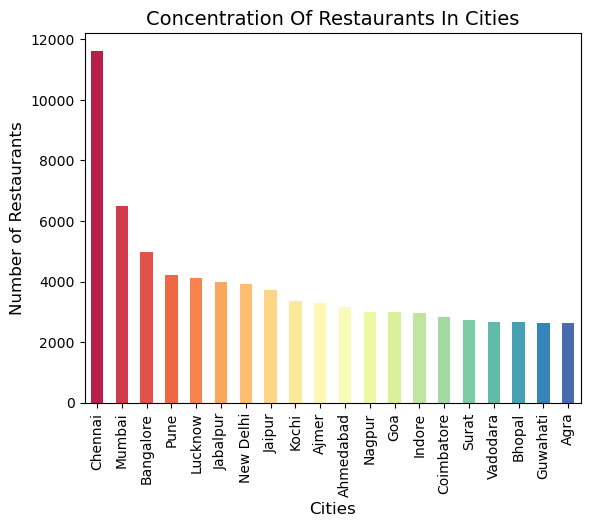

          City  No. of Restaurants
0      Chennai               11630
1       Mumbai                6497
2    Bangalore                4971
3         Pune                4217
4      Lucknow                4121
5     Jabalpur                3994
6    New Delhi                3918
7       Jaipur                3713
8        Kochi                3370
9        Ajmer                3277
10   Ahmedabad                3162
11      Nagpur                2992
12         Goa                2992
13      Indore                2958
14  Coimbatore                2824
15       Surat                2713
16    Vadodara                2678
17      Bhopal                2656
18    Guwahati                2622
19        Agra                2622


In [11]:
city_counts = zodata['city'].value_counts().head(20) 
city_counts.plot(kind='bar', color = sns.color_palette("Spectral", len(city_counts)))  
plt.title('Concentration Of Restaurants In Cities',fontsize=14)  
plt.xlabel('Cities',fontsize=12) 
plt.ylabel('Number of Restaurants',fontsize=12)  
plt.show()  




print(top_cities)

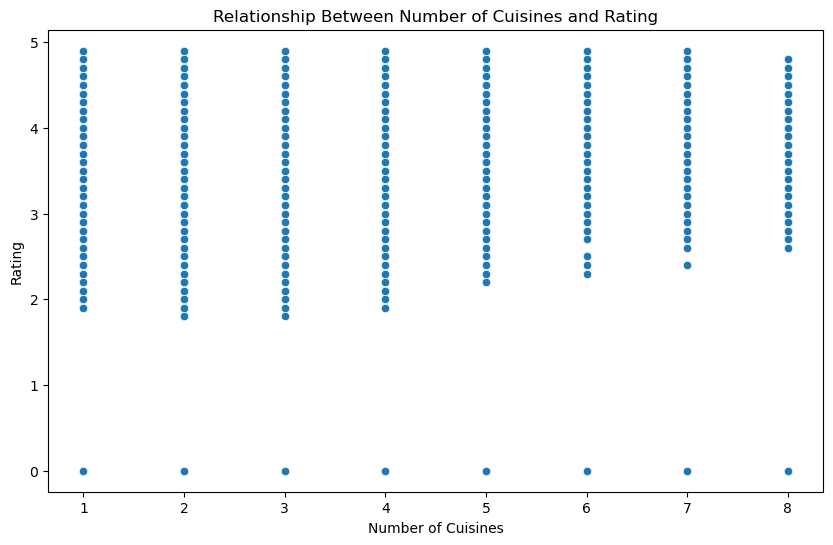

In [12]:

cuisine_count = zodata['cuisines'].value_counts().reset_index()
cuisine_count.columns = ['Cuisines', 'No. of Restaurants']


top_cuisines = cuisine_count.head(20)


zodata['total_cuisines'] = zodata['cuisines'].apply(lambda x: len(x.split(',')))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_cuisines', y='aggregate_rating', data=zodata)
plt.title('Relationship Between Number of Cuisines and Rating')
plt.xlabel('Number of Cuisines')
plt.ylabel('Rating')
plt.show()



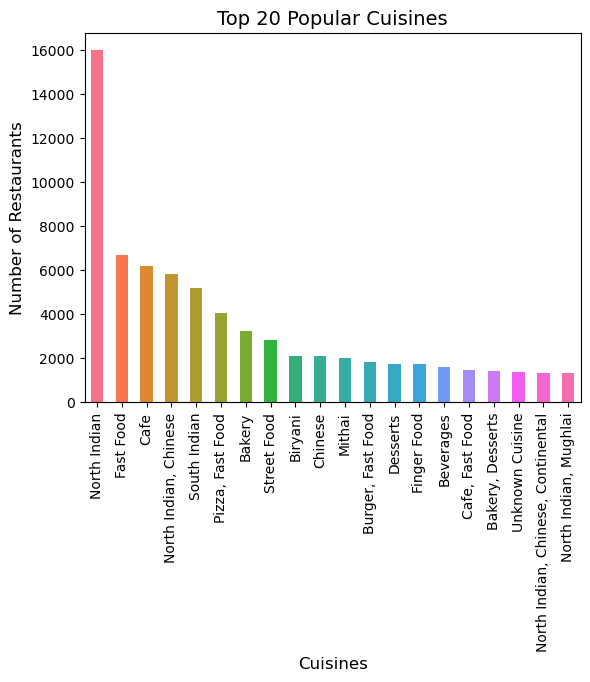

,Cuisines,No. of Restaurants
0,North Indian,15996
1,Fast Food,6721
2,Cafe,6190
3,"North Indian, Chinese",5820
4,South Indian,5217
5,"Pizza, Fast Food",4075
6,Bakery,3238
7,Street Food,2837
8,Biryani,2118
9,Chinese,2116


In [13]:

cuisine_counts = zodata['cuisines'].value_counts().head(20) 
cuisine_counts.plot(kind='bar', color = sns.color_palette("husl", len(cuisine_counts)))  
plt.title('Top 20 Popular Cuisines',fontsize=14)  
plt.xlabel('Cuisines',fontsize=12) 
plt.ylabel('Number of Restaurants',fontsize=12)  
plt.show()  

top_cuisines

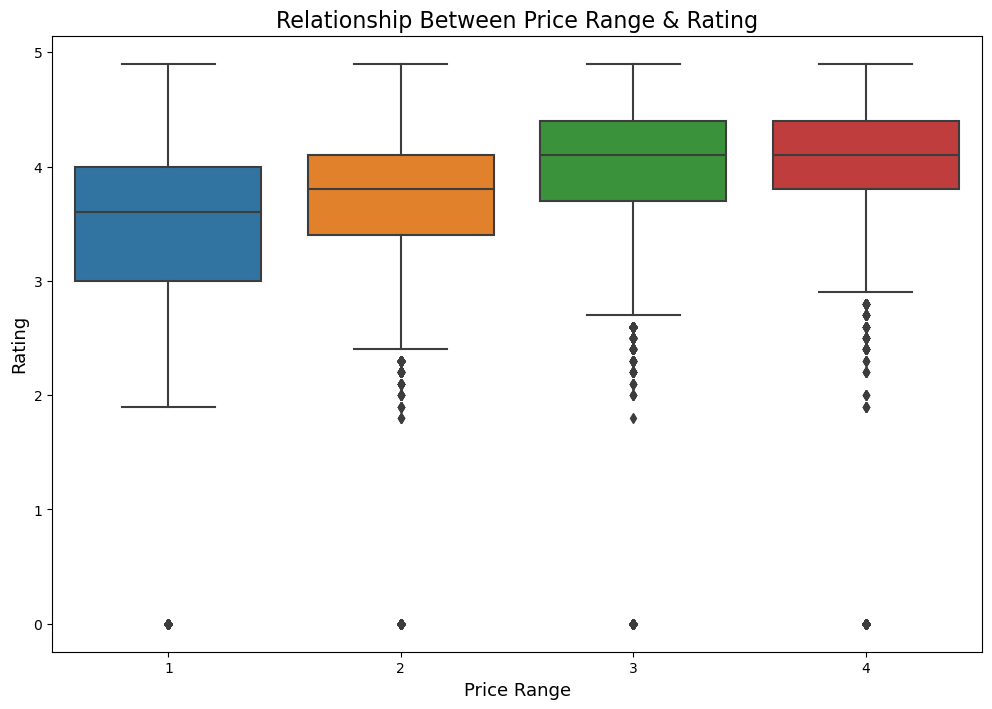

,price_range,average_cost_for_two
0,1,225.265067
1,2,516.288496
2,3,1088.005116
3,4,2215.654482


In [14]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='price_range', y='aggregate_rating', data=zodata)
plt.title('Relationship Between Price Range & Rating',fontsize=16)
plt.xlabel('Price Range',fontsize=13)
plt.ylabel('Rating',fontsize=13)
plt.show()


average_cost_by_price_range = zodata.groupby('price_range')['average_cost_for_two'].mean().reset_index()
average_cost_by_price_range

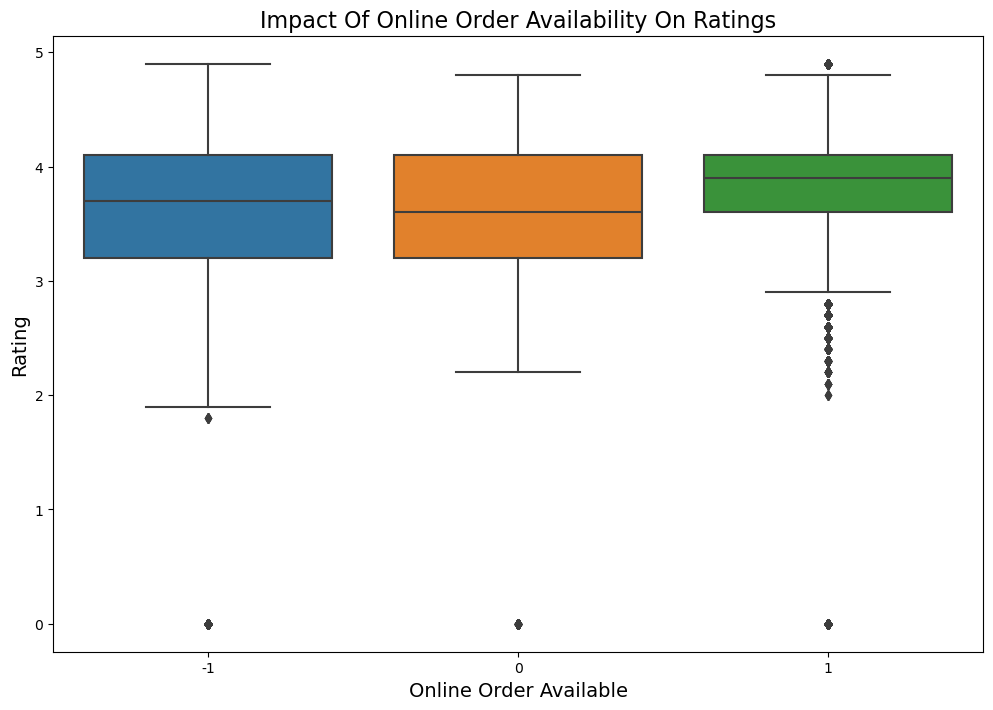

,Opentable_support,Count
0,0.0,211896


In [15]:
zodata['opentable_support'] = zodata['opentable_support'].astype(float)
plt.figure(figsize=(12, 8))
sns.boxplot(x='delivery', y='aggregate_rating', data=zodata)
plt.title('Impact Of Online Order Availability On Ratings',fontsize=16)
plt.xlabel('Online Order Available',fontsize=14)
plt.ylabel('Rating',fontsize=14)
plt.show()


table_booking_count = zodata['opentable_support'].value_counts().reset_index()
table_booking_count.columns = ['Opentable_support', 'Count']

table_booking_count

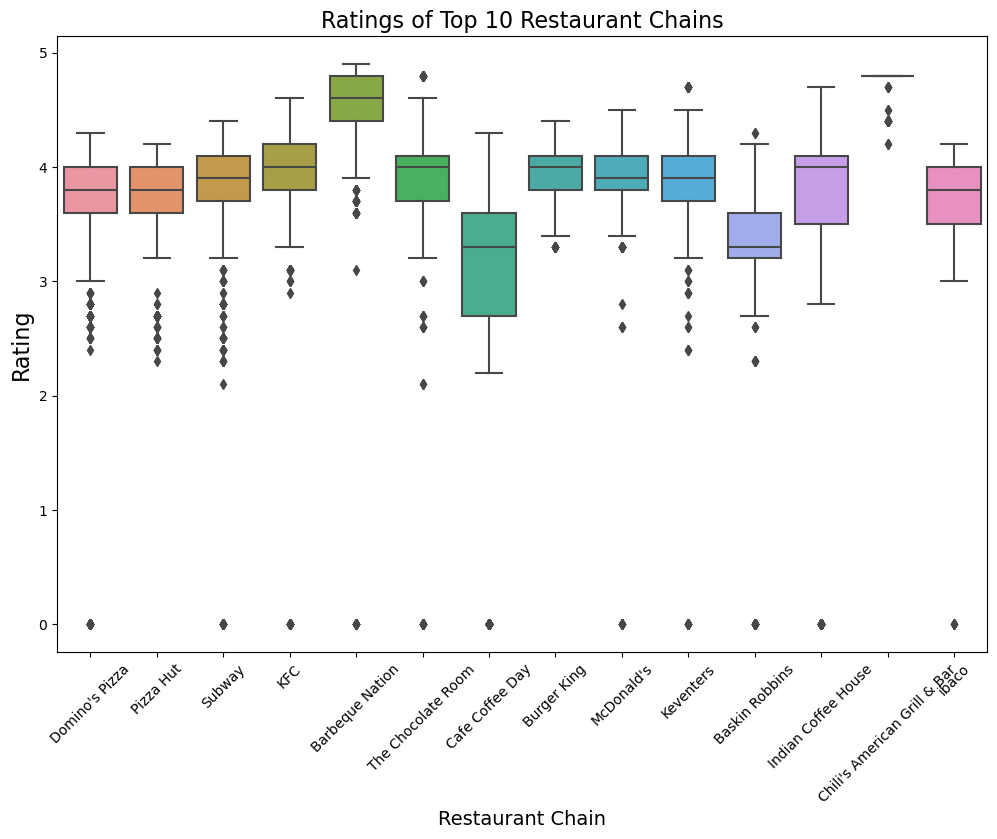

In [16]:

restaurant_chain_count = zodata['name'].value_counts().reset_index()
restaurant_chain_count.columns = ['Restaurant_Chains', 'Outlets']


top_restaurant_chains = restaurant_chain_count.head(14)

plt.figure(figsize=(12, 8))
sns.boxplot(x='name', y='aggregate_rating', data=zodata[zodata['name'].isin(top_restaurant_chains['Restaurant_Chains'])])
plt.title('Ratings of Top 10 Restaurant Chains',fontsize=16)
plt.xlabel('Restaurant Chain',fontsize=14)
plt.ylabel('Rating',fontsize=16)
plt.xticks(rotation=45)
plt.show()

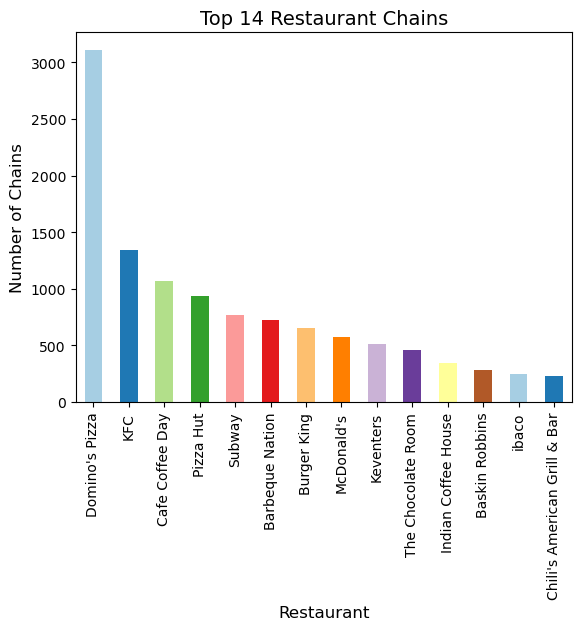

,Restaurant_Chains,Outlets
0,Domino's Pizza,3108
1,KFC,1343
2,Cafe Coffee Day,1068
3,Pizza Hut,936
4,Subway,766
5,Barbeque Nation,725
6,Burger King,658
7,McDonald's,578
8,Keventers,512
9,The Chocolate Room,461


In [17]:
restaurant_chain_count = zodata['name'].value_counts().head(14)
restaurant_chain_count.plot(kind='bar', color=sns.color_palette("Paired", len(city_counts)))  
plt.title('Top 14 Restaurant Chains',fontsize=14)  
plt.xlabel('Restaurant',fontsize=12) 
plt.ylabel('Number of Chains',fontsize=12)  
plt.show()  

top_restaurant_chains

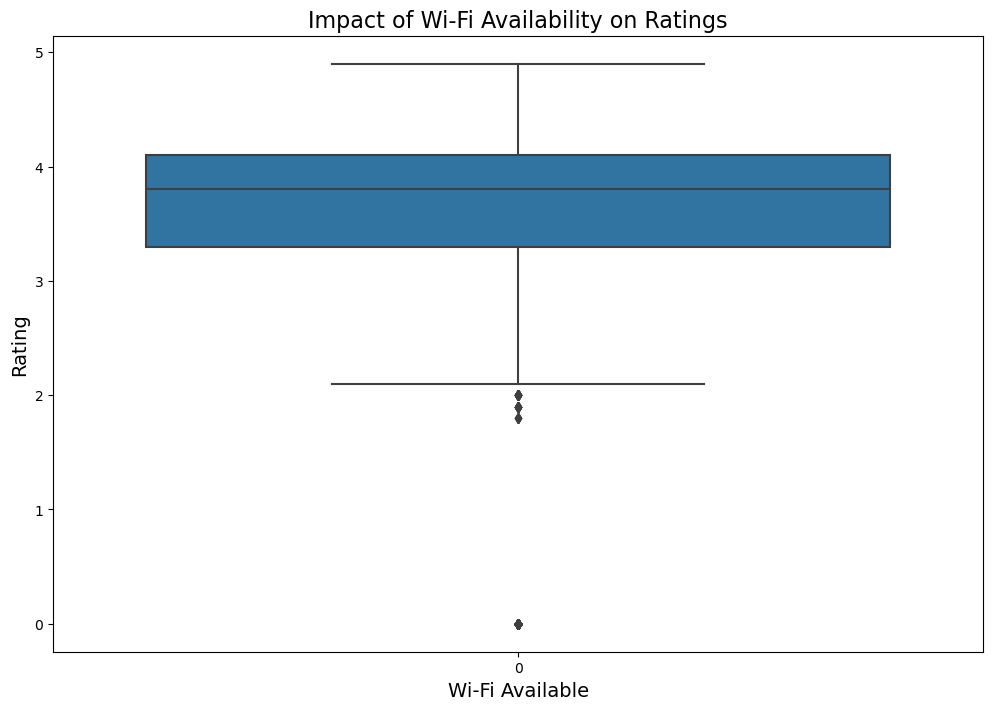

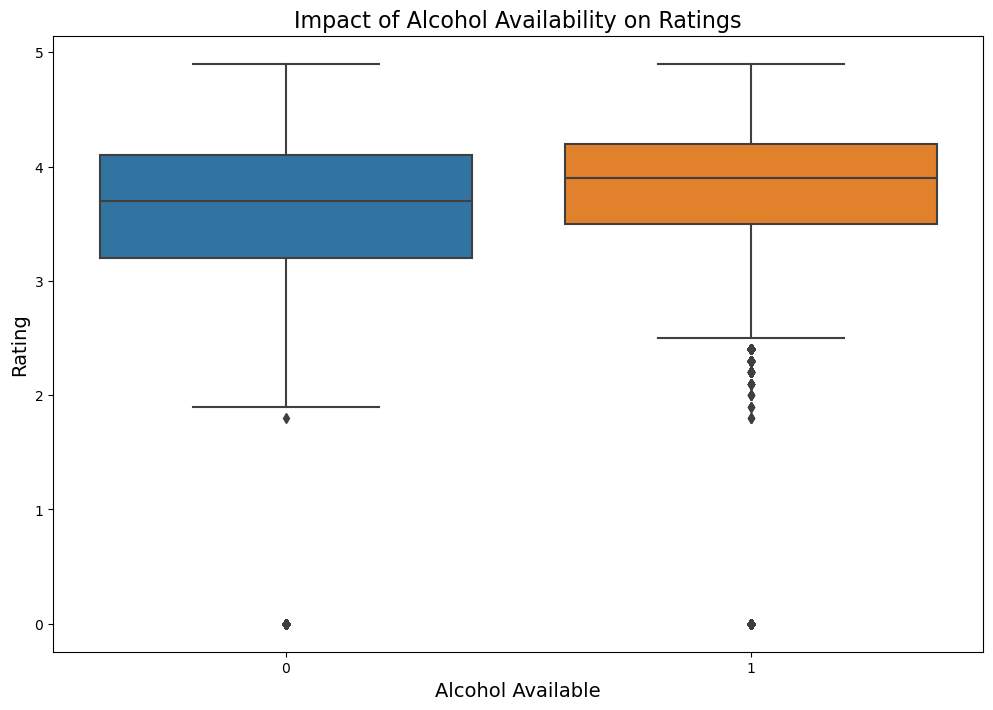

In [18]:

zodata['has_wifi'] = zodata['highlights'].apply(lambda x: 1 if 'Wi-Fi' in x else 0)
zodata['has_alcohol'] = zodata['highlights'].apply(lambda x: 1 if 'Alcohol' in x else 0)


plt.figure(figsize=(12, 8))
sns.boxplot(x='has_wifi', y='aggregate_rating', data=zodata)
plt.title('Impact of Wi-Fi Availability on Ratings',fontsize=16)
plt.xlabel('Wi-Fi Available',fontsize=14)
plt.ylabel('Rating',fontsize=14)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='has_alcohol', y='aggregate_rating', data=zodata)
plt.title('Impact of Alcohol Availability on Ratings',fontsize=16)
plt.xlabel('Alcohol Available',fontsize=14)
plt.ylabel('Rating',fontsize=14)
plt.show()

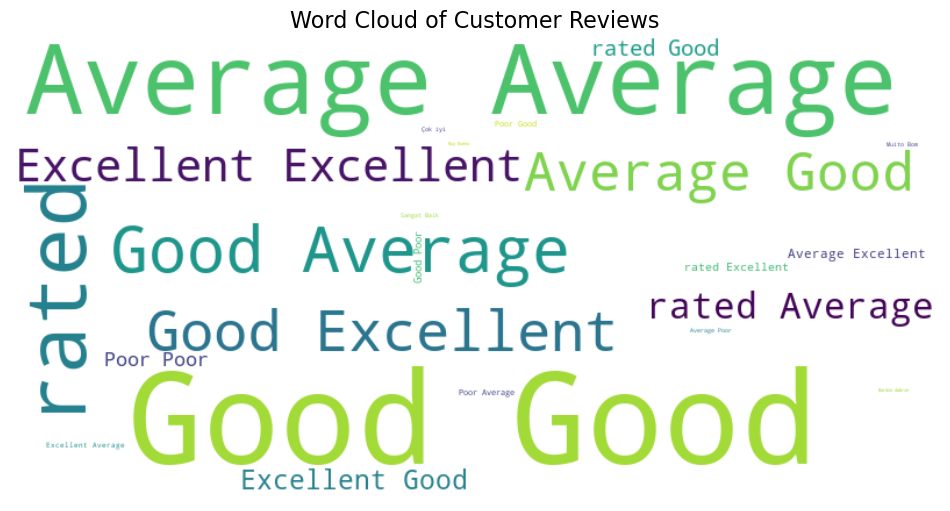

In [19]:

text = ' '.join(zodata['rating_text'].dropna().tolist())


wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)


plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer Reviews',fontsize=16)
plt.show()

city
Bangalore       4.073567
Gurgaon         4.048837
Hyderabad       4.042747
Secunderabad    4.018579
Mumbai          4.004848
                  ...   
Pushkar         1.249174
Darjeeling      1.141116
Kharagpur       0.963740
Alappuzha       0.858842
Palakkad        0.785235
Name: aggregate_rating, Length: 99, dtype: float64


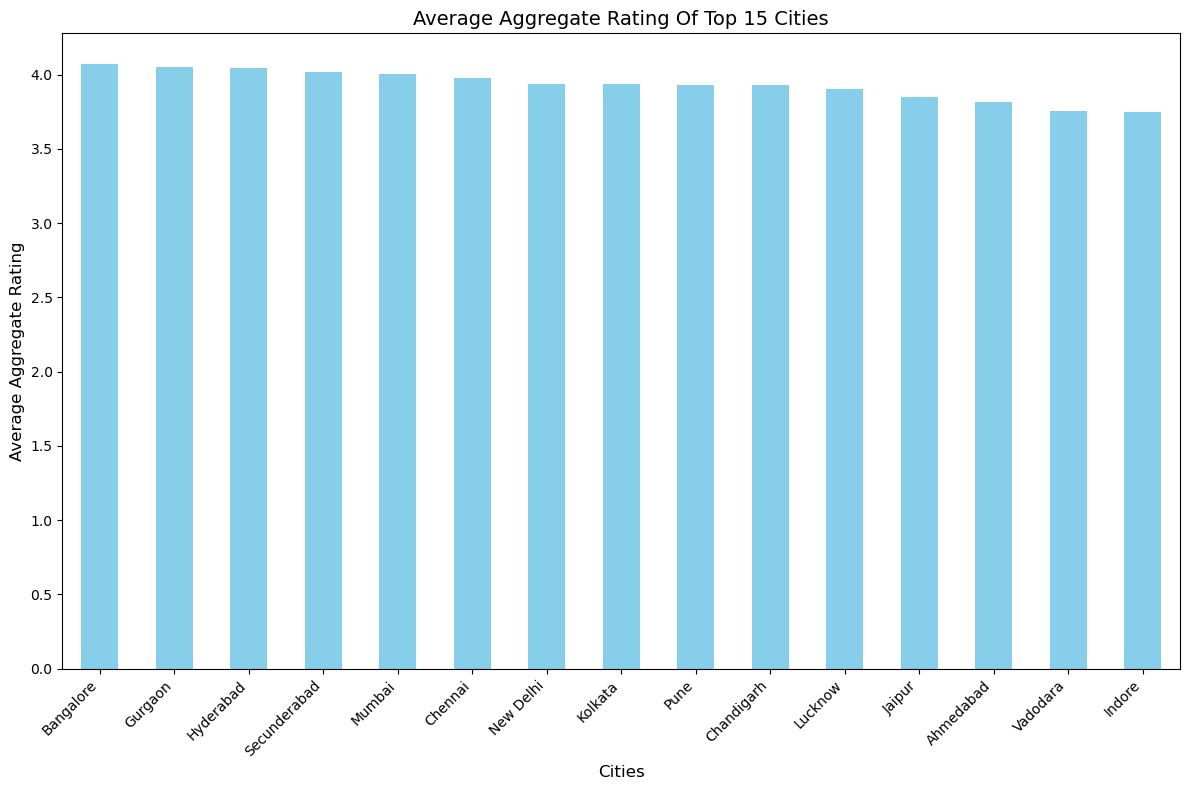

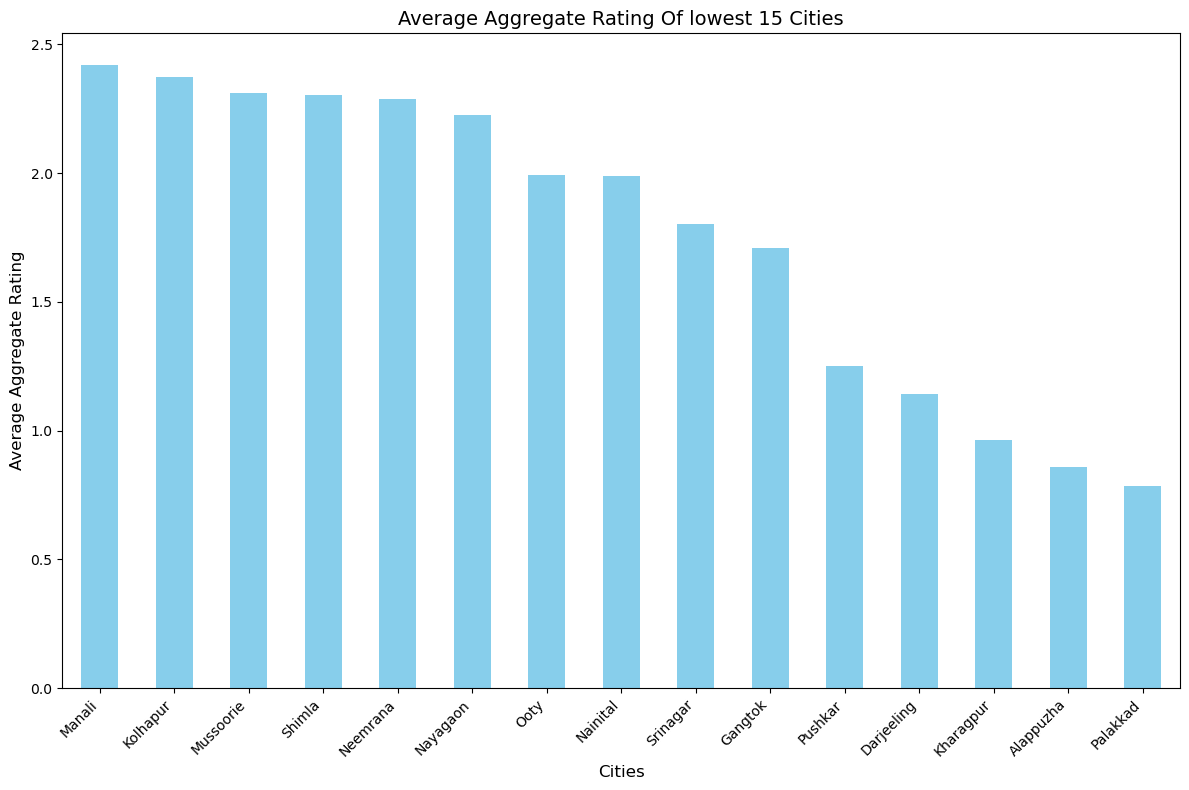

In [20]:
city_avg_rating = zodata.groupby('city')['aggregate_rating'].mean()

print(city_avg_rating.sort_values(ascending=False))


city_avg_rating = zodata.groupby('city')['aggregate_rating'].mean()
sorted_ratings = city_avg_rating.sort_values(ascending=False)
top_avg_rating = sorted_ratings.head(15)
low_avg_rating = sorted_ratings.tail(15)


plt.figure(figsize=(12, 8))  
top_avg_rating.plot(kind='bar', color='skyblue')
plt.xlabel('Cities',fontsize=12)
plt.ylabel('Average Aggregate Rating',fontsize=12)
plt.title('Average Aggregate Rating Of Top 15 Cities',fontsize=14)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))  
low_avg_rating.plot(kind='bar', color='skyblue')
plt.xlabel('Cities',fontsize=12)
plt.ylabel('Average Aggregate Rating',fontsize=12)
plt.title('Average Aggregate Rating Of lowest 15 Cities',fontsize=14)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

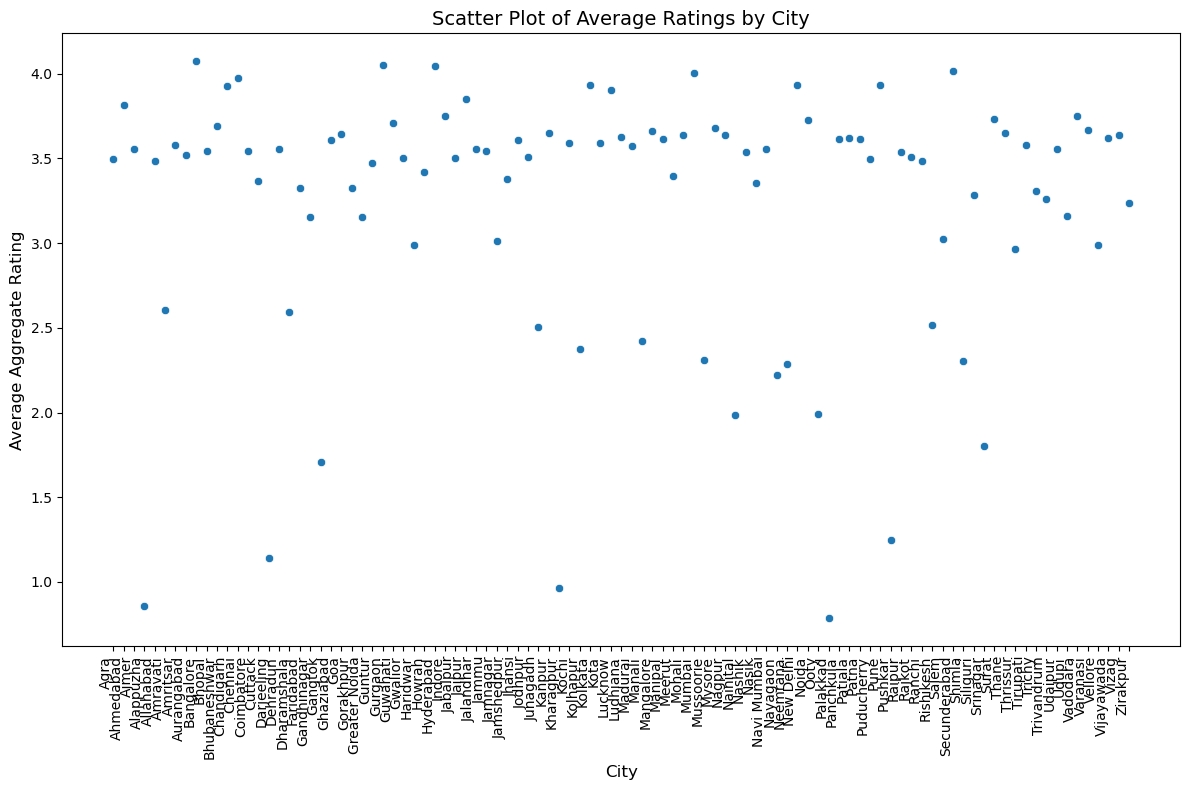

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset the city_avg_rating into a dataframe
city_avg_rating_df = city_avg_rating.reset_index()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='city', y='aggregate_rating', data=city_avg_rating_df)

plt.xlabel('City', fontsize=12)
plt.ylabel('Average Aggregate Rating', fontsize=12)
plt.title('Scatter Plot of Average Ratings by City', fontsize=14)
plt.xticks(rotation=90, ha='right')  # Rotate city names for better readability
plt.tight_layout()
plt.show()

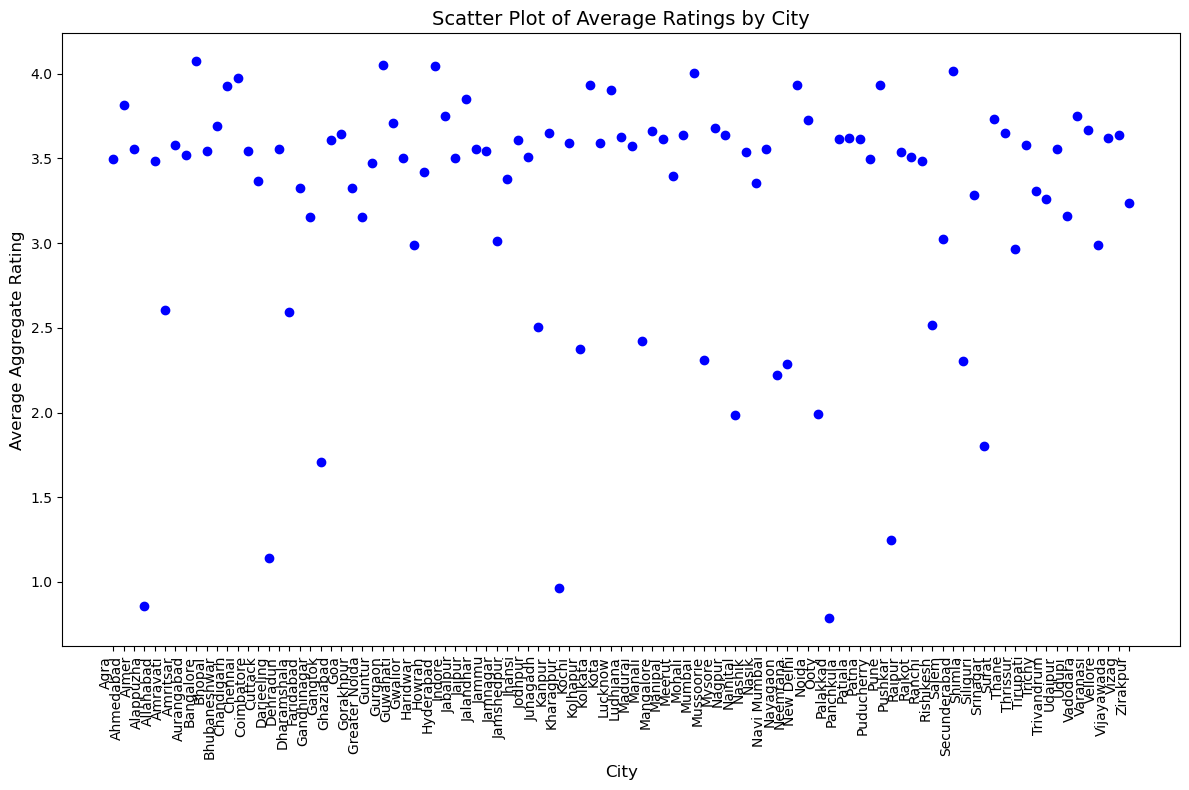

In [22]:
import matplotlib.pyplot as plt

# Reset the city_avg_rating into a dataframe
city_avg_rating_df = city_avg_rating.reset_index()

plt.figure(figsize=(12, 8))
plt.scatter(city_avg_rating_df['city'], city_avg_rating_df['aggregate_rating'], color='blue')

plt.xlabel('City', fontsize=12)
plt.ylabel('Average Aggregate Rating', fontsize=12)
plt.title('Scatter Plot of Average Ratings by City', fontsize=14)
plt.xticks(rotation=90, ha='right')  # Rotate city names for better readability
plt.tight_layout()
plt.show()

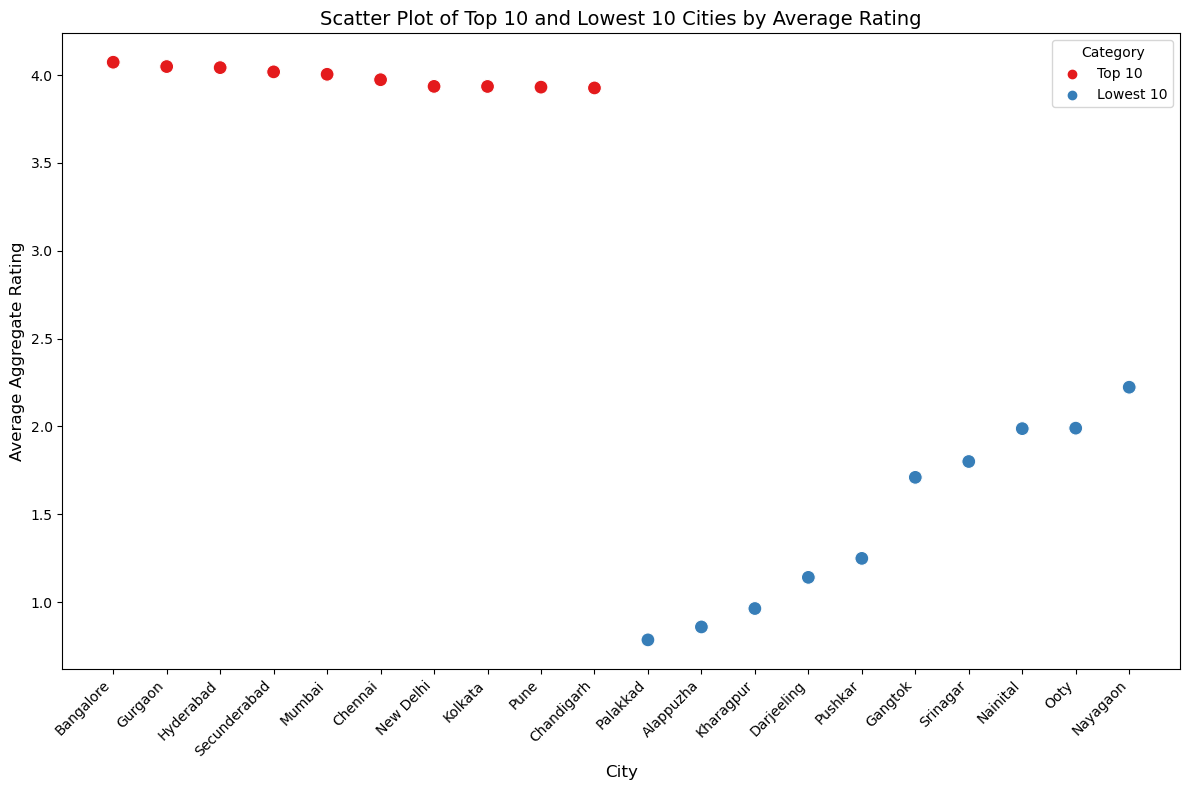

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sorting the city_avg_rating
city_avg_rating = zodata.groupby('city')['aggregate_rating'].mean()

# Get top 10 cities and lowest 10 cities based on average ratings
top_10_avg_rating = city_avg_rating.sort_values(ascending=False).head(10)
low_10_avg_rating = city_avg_rating.sort_values(ascending=True).head(10)

# Combine top 10 and low 10 into a single DataFrame
combined_ratings = pd.concat([top_10_avg_rating, low_10_avg_rating]).reset_index()

# Add a new column to differentiate between top and low cities
combined_ratings['Category'] = ['Top 10'] * 10 + ['Lowest 10'] * 10

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(x='city', y='aggregate_rating', hue='Category', data=combined_ratings, s=100, palette='Set1')

plt.xlabel('City', fontsize=12)
plt.ylabel('Average Aggregate Rating', fontsize=12)
plt.title('Scatter Plot of Top 10 and Lowest 10 Cities by Average Rating', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate city names for better readability
plt.tight_layout()
plt.show()
